In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

From GoDataDriven Advanced Data Science with Python course

## ML Project Improvement

Someone else, say 'your colleague' developed a machine learning project. This project is unfortunately far from perfect, and you were asked to find issues there and make improvements. The more issues you find - the better!

The project includes several parts and is followed by its creator's comments. 

---

**--- project begins here ---**

In [28]:
cars = pd.read_csv('data/cars_dataset.csv').rename(str.lower, axis='columns')
cars.head()

,unnamed: 0,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin
0,0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


### ML Project Motivation and Data Exploration

We are going to try to predict cars' weight from some other characteristics. This will help our company better plan international shipping space allocation.

First I will familiarize ourselves with the data and evaluate its quality.

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed: 0        406 non-null    int64  
 1   name              406 non-null    object 
 2   miles_per_gallon  398 non-null    float64
 3   cylinders         406 non-null    int64  
 4   displacement      406 non-null    float64
 5   horsepower        400 non-null    float64
 6   weight_in_lbs     406 non-null    int64  
 7   acceleration      406 non-null    float64
 8   year              406 non-null    object 
 9   origin            406 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.8+ KB


not many missing values - great!

In [30]:
cars.groupby('origin').name.count()

origin
Europe     73
Japan      79
USA       254
Name: name, dtype: int64

there are too many american cars -- we'd rather have more Japanese cars as they are of better quality but it is how it is

In [31]:
#improving 'year' variable
cars['year']=[int(x[:4]) for x in cars['year']]
cars.groupby('year').name.count()

year
1970    35
1971    29
1972    28
1973    40
1974    27
1975    30
1976    34
1977    28
1978    36
1979    29
1980    29
1982    61
Name: name, dtype: int64

Great that there are mostly cars from 1970s, those were real classics

In [32]:
cars.iloc[:,2:-2].describe()

,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Looks like there is quite some spread in the variables so ML learning training should be quite easy


<AxesSubplot:xlabel='miles_per_gallon', ylabel='weight_in_lbs'>

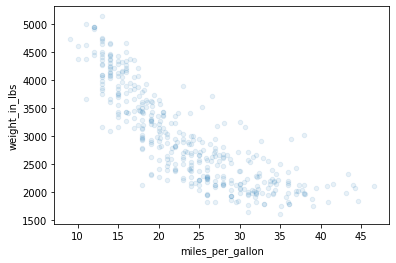

In [33]:
cars.plot('miles_per_gallon', 'weight_in_lbs', kind = 'scatter', alpha = 0.1)

Interesting! Looks like weight is going to be not so hard to predict.

### Preprocessing

Cars with just 3 cylinders are really rare these days - so let's exclude them from the data as outliers:

In [34]:
cars_new = cars[cars.cylinders>3]

there were only a few missing values - so we can drop those

In [35]:
cars_new = cars_new.dropna()

Let's also replace the name column values with the count of symbols in the name. Names themselves are kinda useless

In [36]:
cars_new['name']=[len(name) for name in cars_new['name']]

let's also replace countries with separate categories

In [37]:
cars_new = pd.get_dummies(cars_new, columns = ['origin'])

Finally, let's scale each column in a powerful way: by subtracting the median and dividing by the inter-quantile range

In [38]:
cars_new2 = cars_new
for var_name in cars_new2.columns:
    
    if 'origin' in var_name:
        pass
        print('skipped!')
    else:
    
        median = cars_new2[var_name].median()
        iqr = cars_new2[var_name].quantile(0.75) - cars_new2[var_name].quantile(0.25)

        cars_new2[var_name]=[(x-median)/iqr for x in cars_new2[var_name]]

skipped!
skipped!
skipped!


In [39]:
cars_new2.head()

,unnamed: 0,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin_Europe,origin_Japan,origin_USA
0,-1.040712,1.125,-0.416667,1.0,0.791878,0.694444,0.487744,-1.085271,-1.0,0,0,1
1,-1.035623,0.125,-0.666667,1.0,1.010152,1.342593,0.623009,-1.240310,-1.0,0,0,1
2,-1.030534,0.250,-0.416667,1.0,0.847716,1.064815,0.439077,-1.395349,-1.0,0,0,1
3,-1.025445,-0.375,-0.583333,1.0,0.776650,1.064815,0.436930,-1.085271,-1.0,0,0,1
4,-1.020356,-0.625,-0.500000,1.0,0.766497,0.879630,0.448381,-1.550388,-1.0,0,0,1


Alright! Ready for some Artificial Intelligence now!

In [40]:
cars_new2

,unnamed: 0,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin_Europe,origin_Japan,origin_USA
0,-1.040712,1.125,-0.416667,1.0,0.791878,0.694444,0.487744,-1.085271,-1.0,0,0,1
1,-1.035623,0.125,-0.666667,1.0,1.010152,1.342593,0.623009,-1.240310,-1.0,0,0,1
2,-1.030534,0.250,-0.416667,1.0,0.847716,1.064815,0.439077,-1.395349,-1.0,0,0,1
3,-1.025445,-0.375,-0.583333,1.0,0.776650,1.064815,0.436930,-1.085271,-1.0,0,0,1
4,-1.020356,-0.625,-0.500000,1.0,0.766497,0.879630,0.448381,-1.550388,-1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.000000,-0.125,0.333333,0.0,-0.055838,-0.120370,-0.023260,0.031008,1.0,0,0,1
402,1.005089,-0.875,1.750000,0.0,-0.274112,-0.750000,-0.495616,2.821705,1.0,1,0,0
403,1.010178,-0.375,0.750000,0.0,-0.081218,-0.157407,-0.377527,-1.209302,1.0,0,0,1
404,1.015267,-0.625,0.416667,0.0,-0.157360,-0.250000,-0.141349,0.961240,1.0,0,0,1


### Our fancy AI model

In [41]:
y = cars_new2.weight_in_lbs.values
features = cars_new2.drop('weight_in_lbs', axis = 1).values

In [42]:
from sklearn.model_selection import train_test_split

train_feat, test_feat, train_targ, test_targ = train_test_split(features, y, test_size=0.1, random_state=666)

We will use Gradient Boosting since it's a very powerful ML technique. Hasn't let me down so far!

In [43]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

ML = GBR(n_estimators=50, loss="huber", criterion = 'mae')

ML.fit(train_feat, train_targ)

prediction1 = ML.predict(test_feat)

/Users/lucaverhees/Projects/godatadriven/advanced-ds-w-python/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


In [44]:
from sklearn.metrics import accuracy_score

#print(accuracy_score(test_targ, prediction1))

#doesn't work??

In [45]:
from sklearn.metrics import r2_score

print(round(r2_score(test_targ, prediction1), 2))

0.91


Pretty close to 1! But maybe we can do better

Below I perform a parameter search to find the best AI algorithm

In [46]:
choice_n_estimators = [100, 200, 500, 1000]
choice_loss = ['ls', 'lad', 'huber', 'quantile']

r2_current = 0
BestModel = 0
BestParams = (0, 0)

train_feat, val_feat, train_test, val_test = train_test_split(train_feat, train_targ)

#smart grid search
for param1 in choice_n_estimators:
    for param2 in choice_loss:
    
        try_model = GBR(n_estimators=param1, loss = param2).fit(train_feat, train_targ)

        prediction1 = try_model.predict(val_feat)

        if r2_score(val_targ, prediction1) >= r2_current:

            r2_current = r2_score(val_targ, prediction1)

            BestModel = try_model

            BestParams = param1, param2

        else:
            pass
    
print(r2_current)
print(BestParams)

ValueError: Found input variables with inconsistent numbers of samples: [261, 349]

In [47]:
BestModel.predict(test_feat)

AttributeError: 'int' object has no attribute 'predict'

Great! We have a winner. This high-accuracy model will surely prove to be highly valuable in the future. 

-----

# Answer

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import GradientBoostingRegressor

feature_columns = ['miles_per_gallon', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'year', 'origin']
categorical_columns = ["origin"]

cars = (
    pd.read_csv('data/cars_dataset.csv')
    .rename(str.lower, axis='columns')
    .loc[lambda df: df['cylinders'] > 3]
    .dropna()
    .assign(year=cars.year.astype('int'))
)

X = cars[feature_columns]
y = cars["weight_in_lbs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

ct = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(drop='first', handle_unknown='error'), categorical_columns)
    ], remainder="passthrough") 

model = Pipeline(steps=[
      ('encoding', ct),
      ('scaler', StandardScaler()),
      ('estimator', GradientBoostingRegressor())
])

model.fit(X_train, y_train)
y_pred  = model.predict(X_test)
r2_score(y_pred, y_test)

0.9332067570942832